## Matplotlib for Data Exploration

### Here are the Visualization We’ll Design using matplotlib
1. Bar Graph
2. Pie Chart
3. Box Plot
4. Histogram
5. Line Chart and Subplots
6. Scatter Plot

##### Food Demand Forecasting Dataset


Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.
 

Data Dictionary
 

Weekly Demand data (train.csv): Contains the historical demand data for all centers, test.csv contains all the following features except the target variable
 

Variable	Definition
id	Unique ID
week	Week No
center_id	Unique ID for fulfillment center
meal_id	Unique ID for Meal
checkout_price	Final price including discount, taxes & delivery charges
base_price	Base price of the meal
emailer_for_promotion	Emailer sent for promotion of meal
homepage_featured	Meal featured at homepage
num_orders	(Target) Orders Count
   

fulfilment_center_info.csv: Contains information for each fulfilment center
 

Variable	Definition
center_id	Unique ID for fulfillment center
city_code	Unique code for city
region_code	Unique code for region
center_type	Anonymized center type
op_area	Area of operation (in km^2)
 

meal_info.csv: Contains information for each meal being served
 

Variable	Definition
meal_id	Unique ID for the meal
category	Type of meal (beverages/snacks/soups….)
cuisine	Meal cuisine (Indian/Italian/…)
 

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

Our dataset has three dataframes: df_meal describing the meals, df_center describing the food centers, and df_food describing the overall food order. Have a look at them below:

In [83]:
df_meal = pd.read_csv('meal_info.csv') 
df_meal.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [84]:
df_center = pd.read_csv('fulfilment_center_info.csv') 
df_center.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [85]:
df_food = pd.read_csv('train.csv') 
df_food.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

I will first merge all the three dataframes into a single dataframe. This will make it easier to manipulate the data while plotting it:

In [86]:
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

In [87]:
df

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
456543  1437396   141         61     2104          583.03      630.53   
456544  1060716   142         61     2104          581.03      582.03   
456545  1029231   143         61     2104          583.03      581.03   
456546  1141147   144         61     2104          582.03      581.03   
456547  1443704   145         61     2104          581.03      582.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                           0                  0         177        647   
1                           0                  0         323        647   
2                           0                  0          96        647   
3                           0                  0         163        647   
4                           0                  0         215        647   
...                       ...                ...         ...        ...   
456543                      0                  1          13        473   
456544                      0                  0          42        473   
456545                      0                  0          40        473   
456546                      0                  0          53        473   
456547                      0                  0          27        473   

        region_code center_type  op_area   category      cuisine  
0                56      TYPE_C      2.0  Beverages         Thai  
1                56      TYPE_C      2.0  Beverages         Thai  
2                56      TYPE_C      2.0  Beverages         Thai  
3                56      TYPE_C      2.0  Beverages         Thai  
4                56      TYPE_C      2.0  Beverages         Thai  
...             ...         ...      ...        ...          ...  
456543           77      TYPE_A      4.5       Fish  Continental  
456544           77      TYPE_A      4.5       Fish  Continental  
456545           77      TYPE_A      4.5       Fish  Continental  
456546           77      TYPE_A      4.5       Fish  Continental  
456547           77      TYPE_A      4.5       Fish  Continental  

[456548 rows x 15 columns]

### 1. Bar Graph using matplotlib First, we want to find the most popular food item that customers have bought from the company.

I will be using the Pandas pivot_table function to find the total number of orders for each category of the food item:

In [88]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

num_orders
category                
Beverages       40480525
Biryani           631848
Desert           1940754
Extras           3984979
Fish              871959
Other Snacks     4766293
Pasta            1637744
Pizza            7383720
Rice Bowl       20874063
Salad           10944336
Sandwich        17636782
Seafood          2715714
Soup             1039646
Starters         4649122

Bar graphs are best used when we need to compare the quantity of categorical values within the same category.

It is always important to label your axis. You can do this by employing the plt.xlabel() and plt.ylabel() functions. You can use plt.title() for naming the title of the plot. If your xticks are overlapping, rotate them using the rotate parameter in plt.xticks() so that they are easy to view for the audience.

You can save your plot using the plt.savefig() function by providing the file path as a parameter. Finally, always display your plot using plt.show().

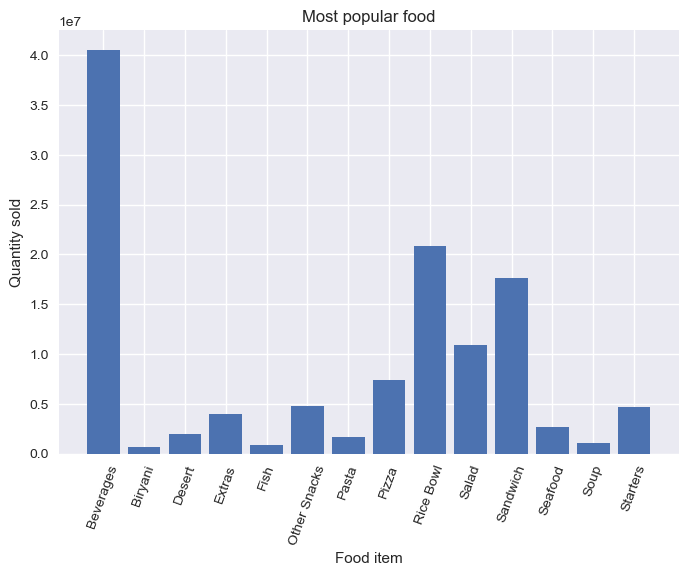

<Figure size 800x550 with 0 Axes>

In [89]:
# Barplot
plt.bar(table.index,table['num_orders'])
#for index, value in enumerate(table['num_orders']):
    #plt.text(value, index,str(value))
plt.xticks(rotation=70)
plt.xlabel('Food item') 
plt.ylabel('Quantity sold') 
plt.title('Most popular food') 
plt.show()
plt.savefig('most_popular_food')

While analyzing the plot, we can see that Beverages were the most popular food item sold by the company. Wait, was it because they were sold with almost all the meals? Was Rice Bowl the most popular food item?

#### Let’s divide the total food item order by the number of unique meals it is present in.

In [90]:
table.index.unique()

Index(['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish', 'Other Snacks',
       'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup',
       'Starters'],
      dtype='object', name='category')

In [91]:
table.index.nunique()

14

In [26]:
#df_meal[df_meal['category']==table.index[4]].shape

(3, 3)

In [92]:
item_count = {}

for i in range(table.index.nunique()):
    print(table.num_orders[i])
    print(df_meal[df_meal['category']==table.index[i]].shape[0])
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]


40480525
12
631848
3
1940754
3
3984979
3
871959
3
4766293
3
1637744
3
7383720
3
20874063
3
10944336
3
17636782
3
2715714
3
1039646
3
4649122
3


In [94]:
item_count

{'Beverages': 3373377.0833333335,
 'Biryani': 210616.0,
 'Desert': 646918.0,
 'Extras': 1328326.3333333333,
 'Fish': 290653.0,
 'Other Snacks': 1588764.3333333333,
 'Pasta': 545914.6666666666,
 'Pizza': 2461240.0,
 'Rice Bowl': 6958021.0,
 'Salad': 3648112.0,
 'Sandwich': 5878927.333333333,
 'Seafood': 905238.0,
 'Soup': 346548.6666666667,
 'Starters': 1549707.3333333333}

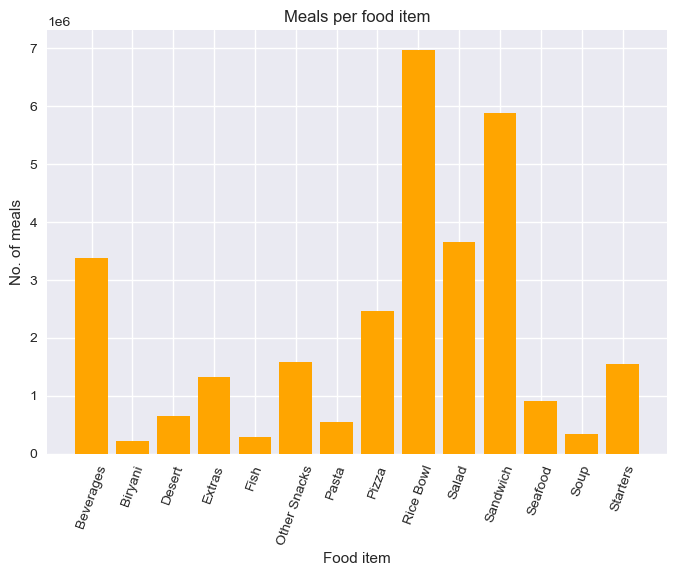

In [101]:
#dictionary for meals per food item

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Food item')

#label y-axis
plt.ylabel('No. of meals')

#label the plot
plt.title('Meals per food item')

#save plot
plt.savefig('matplotlib_plotting_7.png',dpi=300,bbox_inches='tight')

#display plot
plt.show()

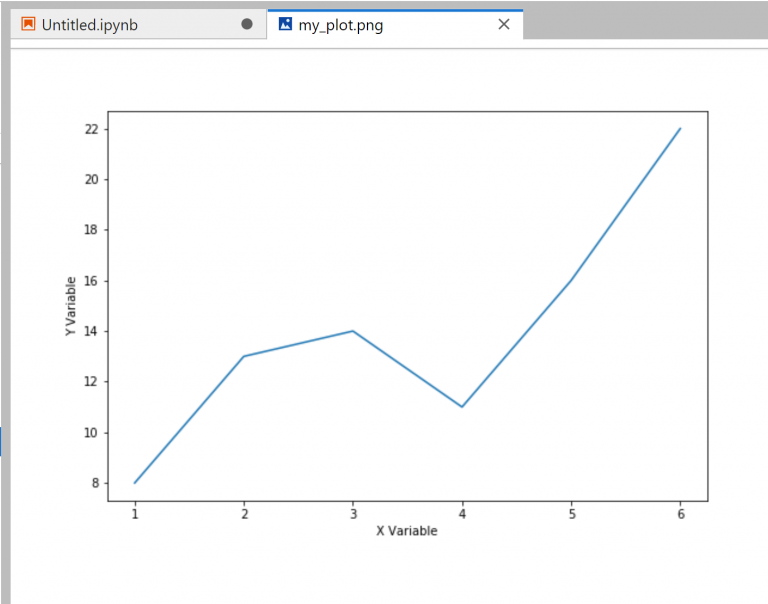

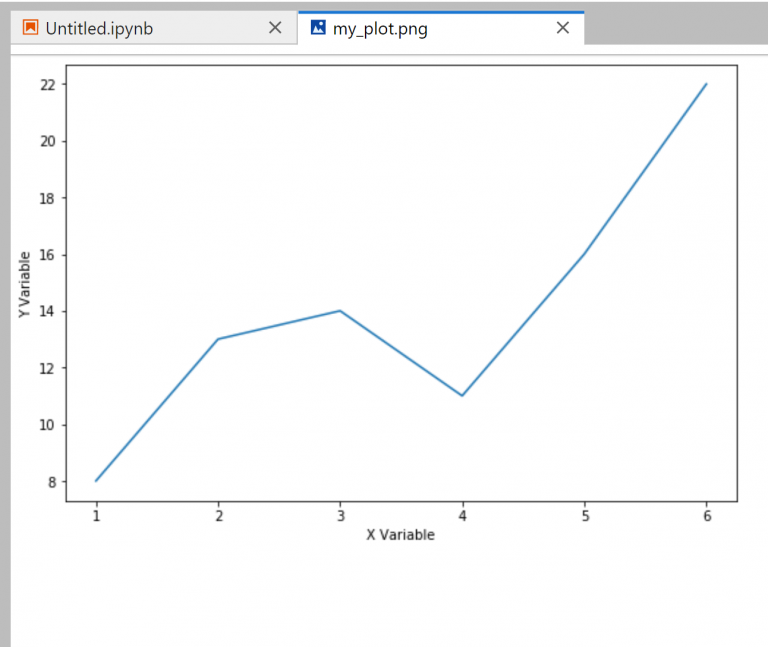

In [96]:
df['cuisine']

0                Thai
1                Thai
2                Thai
3                Thai
4                Thai
             ...     
456543    Continental
456544    Continental
456545    Continental
456546    Continental
456547    Continental
Name: cuisine, Length: 456548, dtype: object

### 2.  Pie Chart using matplotlib Let us now see the ratio of orders from each cuisine.

##### A pie chart is suitable to show the proportional distribution of items within the same category.

In [106]:
df['cuisine'].unique()[3]

'Continental'

In [102]:
#dictionary for cuisine and its total orders
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

print("total number of orders:"+ ' '+str(total))

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):
    print(i)

#cuisine
    c = df['cuisine'].unique()[i]
    print(c)

#num of orders for the cuisine
    c_order = df[df['cuisine']==c]['num_orders'].sum()
    d_cuisine[c] = c_order/total
#print(c_order)
#print(d_cuisine[c])
print(d_cuisine.values())

total number of orders: 119557485
0
Thai
1
Indian
2
Italian
3
Continental
dict_values([0.27332182506181024, 0.21573341058487472, 0.36946939792184486, 0.14147536643147018])


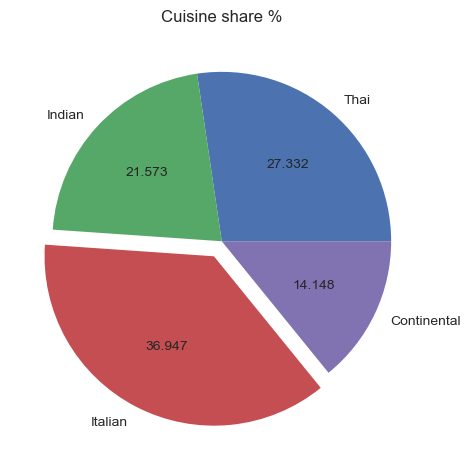

In [107]:
#pie plot 
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.3f',explode=[0, 0, 0.1, 0]) 

#label the plot 
plt.title('Cuisine share %') 
plt.savefig('matplotlib_plotting_8.png',dpi=300, bbox_inches='tight') 
plt.show();

### 3. Box Plot using matplotlib Since we are discussing cuisine, let’s check out which one is the most expensive cuisine! For this, I will be using a Box Plot.

Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.

The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively
The top whisker represents Q3+1.5*IQR
The bottom whisker represents Q1-1.5*IQR
Outliers are shown as scatter points
Shows skewness in the data

In [45]:
#dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

In [111]:
c_price['Indian']

32659     437.53
32660     435.53
32661     435.53
32662     437.53
32663     437.53
           ...  
375719    486.03
375720    484.03
375721    485.03
375722    486.03
375723    486.03
Name: base_price, Length: 112612, dtype: float64

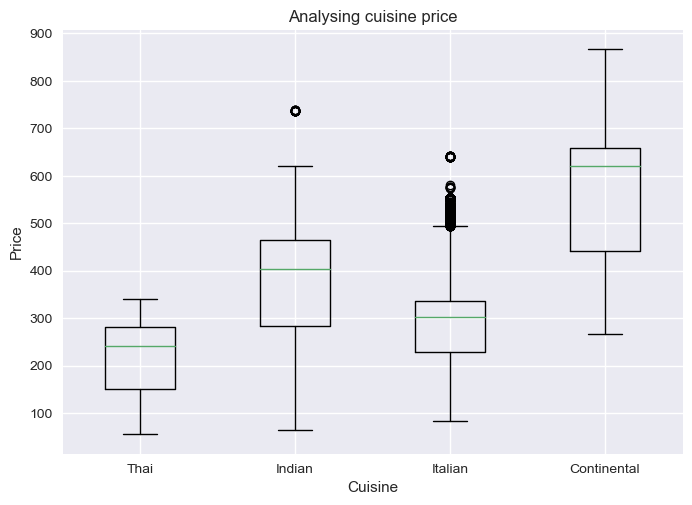

In [50]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 

#save and display 
plt.savefig('matplotlib_plotting_9.png',dpi=300,bbox_inches='tight') 
plt.show()

Continental cuisine was the most expensive cuisine served by the company! Even its median price is higher than the maximum price of all the cuisines.


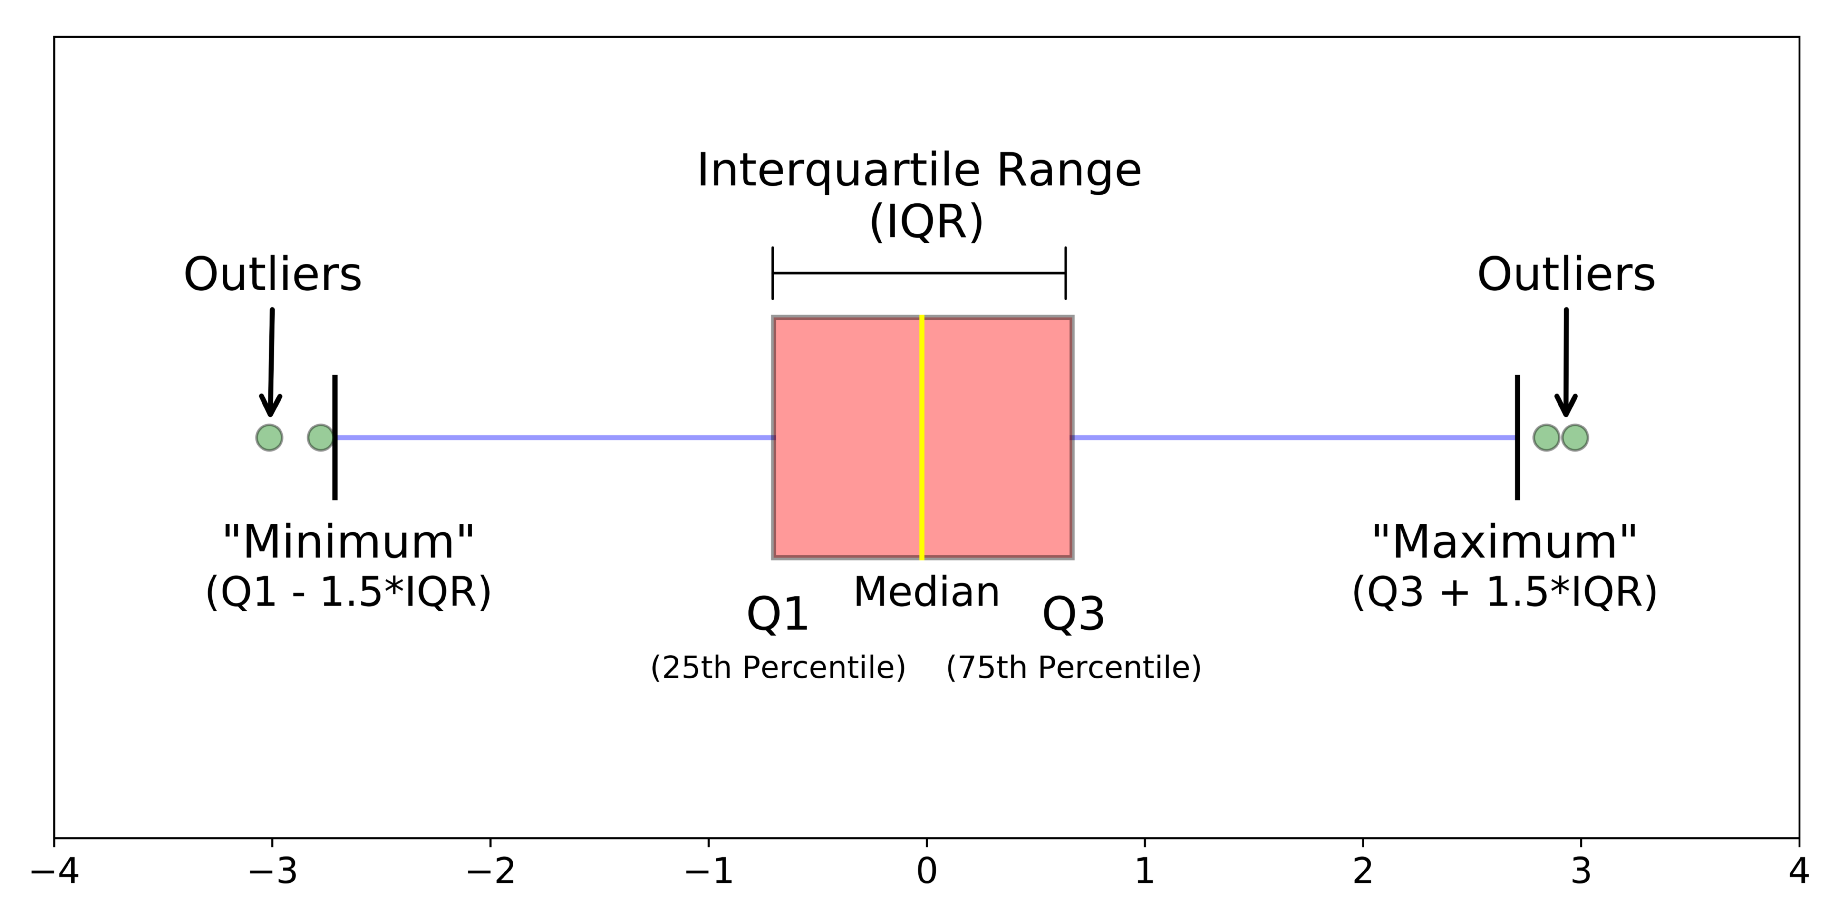

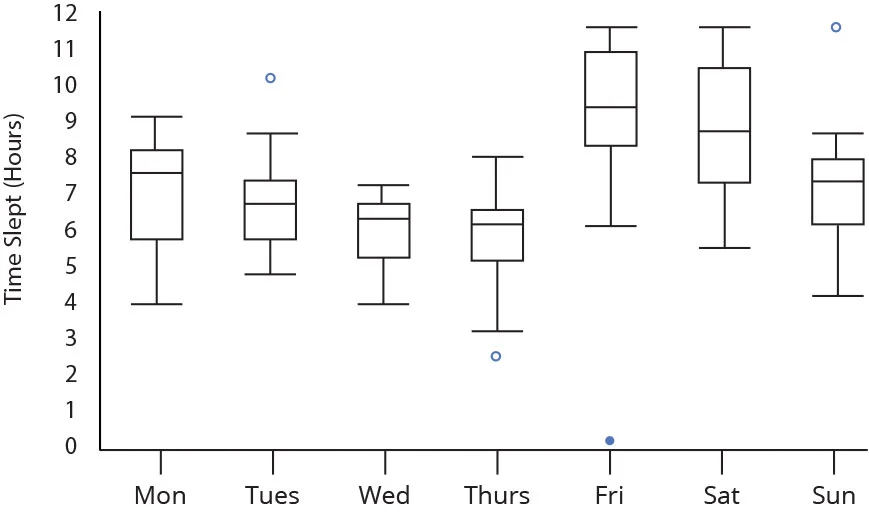

### 4. Histogram using matplotlib On the topic of prices, did we forget to inspect the base price and checkout price? Don’t worry, we will do that using a histogram.

A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

Since base_price is a continuous variable, we will inspect its range in different distinct orders using a histogram. We can do this using plt.hist().

But the confusing part is what should be the number of bins? By default, it is 10. However, there is no correct answer and you can vary it according to your dataset to best visualize it.

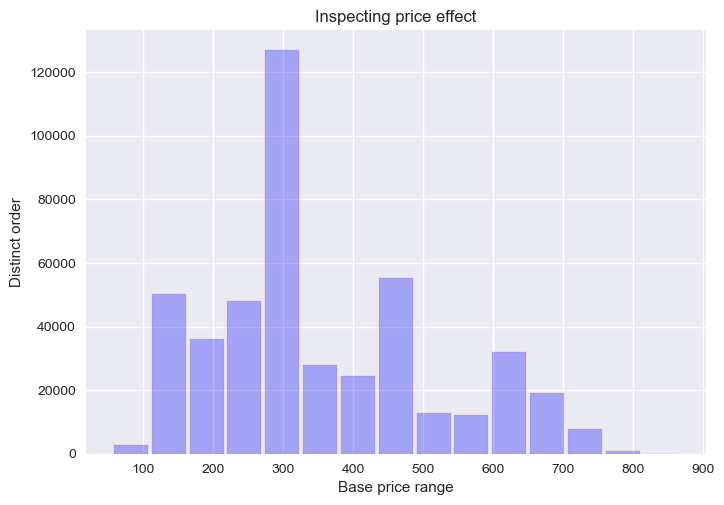

In [113]:
#plotting histogram 
plt.hist(df['base_price'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 

#plot title 
plt.title('Inspecting price effect') 

#save and display the plot 
plt.savefig('matplotlib_plotting_10.png',dpi=300,bbox_inches='tight') 
plt.show();

#### I have chosen the number of bins as 15 and it is evident that most of the orders had a base price of ~300.

It is easy to confuse histograms with bar plots. But remember, histograms are used with continuous data whereas bar plots are used with categorical data.

### Line Plot and Subplots using matplotlib
A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.

#### How are the weekly and monthly sales of the company varying? This is a critical business question that makes or breaks the marketing strategy.

Before exploring that, I will create two lists for storing the week-wise and month-wise revenue of the company:

In [114]:
df['week']

0           1
1           2
2           3
3           4
4           5
         ... 
456543    141
456544    142
456545    143
456546    144
456547    145
Name: week, Length: 456548, dtype: int64

In [60]:
#new revenue column 
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 

#new month column 
df['month'] = df['week'].apply(lambda x: x//4) 

#list to store month-wise revenue 
month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 
    
#list to store week-wise revenue 
week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

I will compare the revenue of the company in every week as well as in every month using two line-plots drawn side by side. For this, I will be using the plt.subplots() function.

Matplotlib subplots makes it easy to view and compare different plots in the same figure.

To understand how this function works, you need to know what Figure, Axes, and Axis are in a matplotlib plot.

Figure is the outermost container for the Matplotlib plot(s). There can a single or multiple plots, called Axes, within a Figure. Each of these Axes contains the x and y-axis known as the Axis.

The plt.subplots() figure returns the figure and axes. You can provide as an input to the function how you want to display the axes within the figure. These will be adjusted using the nrows and ncols parameters. You can even adjust the size of the figure using the figsize parameter.

Axes are returned as a list. To plot for specific axes, you can access them as a list object. The rest of the plotting is done the same way as simple plots:

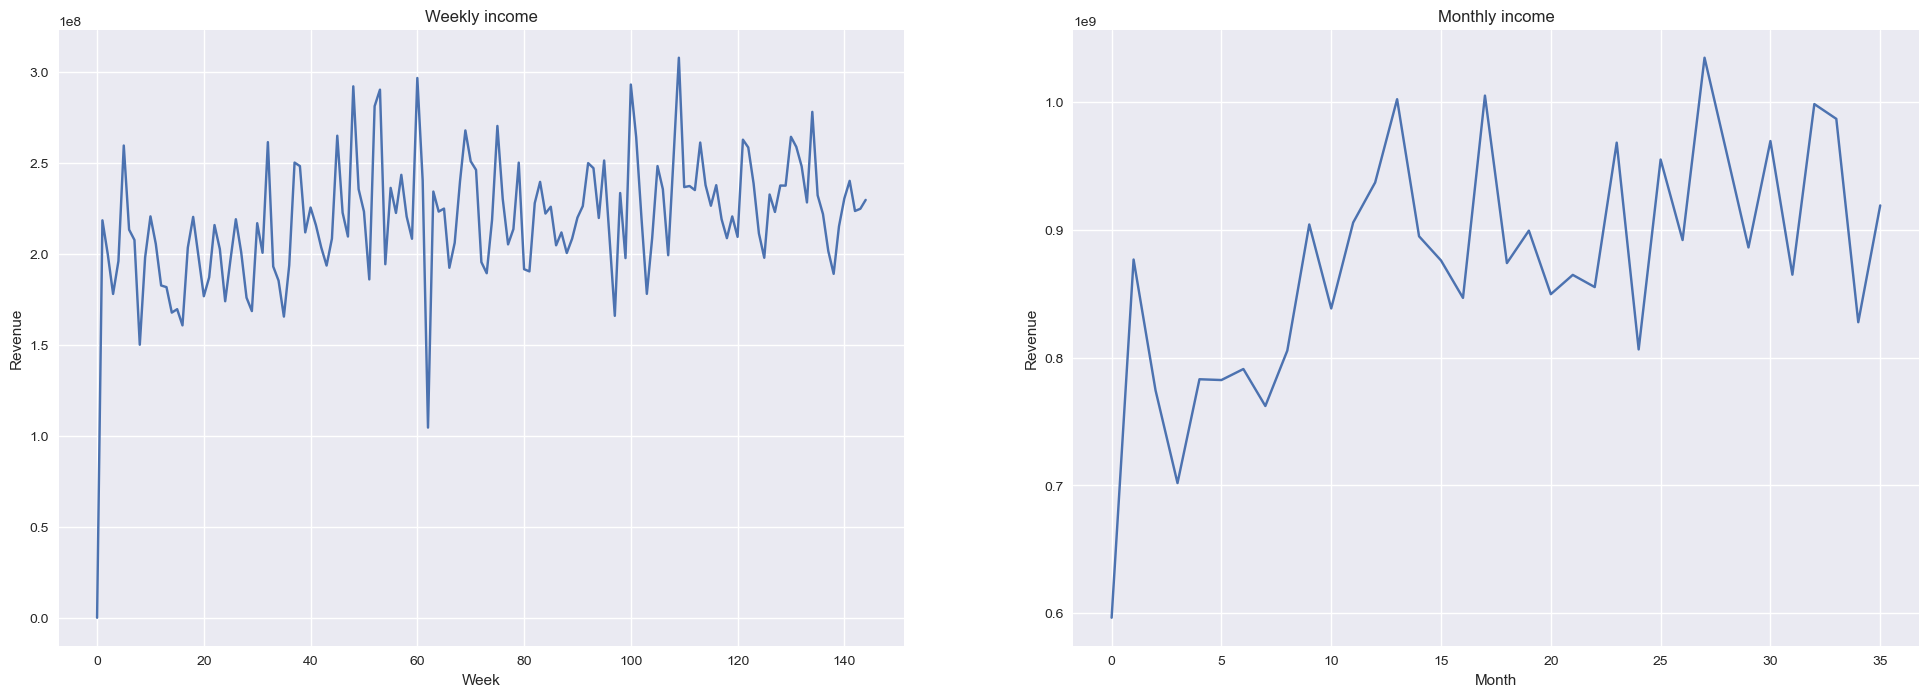

In [117]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(24,8)) 

#manipulating the first Axes 
ax[0].plot(week,week_order) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

#manipulating the second Axes 
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income') 

#save and display the plot 
plt.savefig('matplotlib_plotting_11.png',dpi=300,bbox_inches='tight') 
plt.show()

### Scatter Plot using matplotlib
##### Finally, I will try to analyze whether the center type had any effect on the number of orders from different center types. I will do this by comparing a scatter plot, a boxplot and a bar graph in the same figure.

We have already seen the use of boxplots and bar graphs, but scatter plots have their own advantages.

Scatter plots are useful for showing the relationship between two variables. Any correlation between variables or outliers in the data can be easily spotted using scatter plots.

In [118]:
center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 

#relation between op area and number of orders 
op_table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum) 

op_table

num_orders
op_area            
0.9          425160
1.9          497338
2.0         1521501
2.4          637527
2.7         3058120
2.8         4656558
2.9          898613
3.0         2062748
3.2         1218319
3.4         3478065
3.5         1812167
3.6         4596156
3.7         2797300
3.8         7977964
3.9        10738365
4.0        11780398
4.1         5202521
4.2         3116118
4.4         8367833
4.5         8043504
4.6         1833427
4.7         1739081
4.8         5237062
5.0         1906535
5.1         5641494
5.3         1628964
5.6         3125835
6.3         3381018
6.7         4296545
7.0         7881249

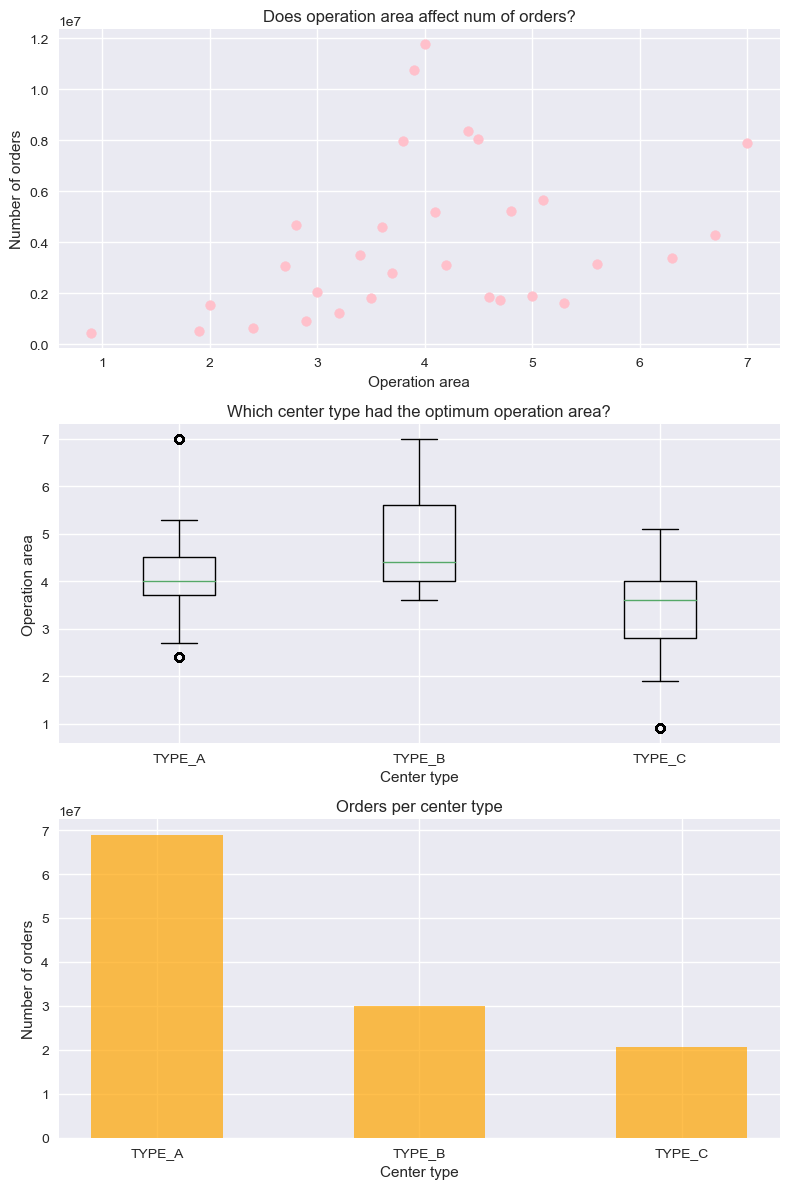

In [119]:
#relation between center type and op area 
c_type = {} 
for i in center_type_name: 
    c_type[i] = df[df['center_type']==i].op_area 

#relation between center type and num of orders 
center_table=pd.pivot_table(df,index='center_type',values='num_orders',aggfunc=np.sum) 

#subplots 
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) 

#scatter plots 
ax[0].scatter(op_table.index,op_table['num_orders'],color='pink') 
ax[0].set_xlabel('Operation area') 
ax[0].set_ylabel('Number of orders') 
ax[0].set_title('Does operation area affect num of orders?') 
#ax[0].annotate('optimum operation area of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12) 

#boxplot 
ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()]) 
ax[1].set_xlabel('Center type') 
ax[1].set_ylabel('Operation area') 
ax[1].set_title('Which center type had the optimum operation area?') 

#bar graph 
ax[2].bar(center_table.index,center_table['num_orders'],alpha=0.7,color='orange',width=0.5) 
ax[2].set_xlabel('Center type') 
ax[2].set_ylabel('Number of orders') 
ax[2].set_title('Orders per center type') 

#show figure 
plt.tight_layout() 
plt.savefig('matplotlib_plotting_12.png',dpi=300,bbox_inches='tight') 
plt.show();

The scatter plot makes it instantly visible that the optimum operation area of a center is 4 km sq. The boxplot shows that the TYPE_A center type had the most number of optimum size centers because of a compact box with a median around 4 km sq. Because of this, they had more orders placed by customers than any other center type.

[Text(0, 0, '6'),
 Text(0, 0, '16'),
 Text(0, 0, '75'),
 Text(0, 0, '160'),
 Text(0, 0, '244'),
 Text(0, 0, '260'),
 Text(0, 0, '145'),
 Text(0, 0, '73'),
 Text(0, 0, '16'),
 Text(0, 0, '4'),
 Text(0, 0, '1')]

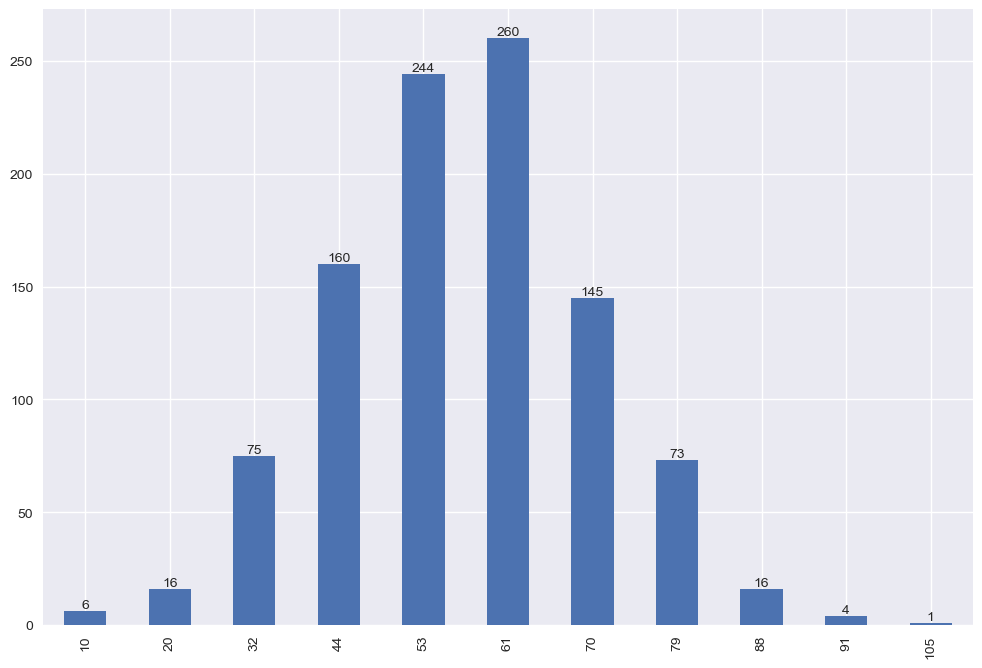

In [81]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Scores = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]

score_series = pd.Series(Scores)

x_labels = [10, 20, 32, 44, 53, 61, 70, 79, 88, 91, 105]


# Plot the figure.
plt.figure(figsize=(12, 8))
fig = score_series.plot(kind='bar')
fig.set_xticklabels(x_labels)
fig.bar_label(fig.containers[0], label_type='edge')